# <center>CSE3024 Lab 5: Index Compression </center>
<h3 align="right">Faraz Suhail</h3> 
<h3 align="right">19BCE1525</h3> 

### Ques 1.	Apply run length encoding for the following string and compress it.

In [9]:
def encodes(message):
    encoded_string = ""
    i = 0
    while (i <= len(message)-1):
        count = 1
        ch = message[i]
        j = i
        while (j < len(message)-1): 
            if (message[j] == message[j + 1]): 
                count = count + 1
                j = j + 1
            else: 
                break
        encoded_string = encoded_string + str(count) + ch
        i = j + 1
    return encoded_string

In [11]:
def decodes(message):
    decoded_message = ""
    i=0
    j=0
    while (i <= len(message)-1):
        run_count = int(message[i])
        run_word = message[i + 1]
        for j in range(run_count):
            decoded_message = decoded_message+run_word
            j = j + 1
        i = i + 2
    return decoded_message

In [14]:
message = "faaarrrrrrrrraaaaaaaz"
encoded_message=encodes(message)
decoded_message=decodes(encoded_message)
print("Original message: "+message+"\nEncoded message: "+encoded_message+"\nDecoded message: "+decoded_message+"\n")

Original message: faaarrrrrrrrraaaaaaaz
Encoded message: 1f3a9r7a1z
Decoded message: faaarrrrrrrrraaaaaaaz



### Ques 2.	Consider the following Inverted Index File with Terms, Occurrences and Posting List

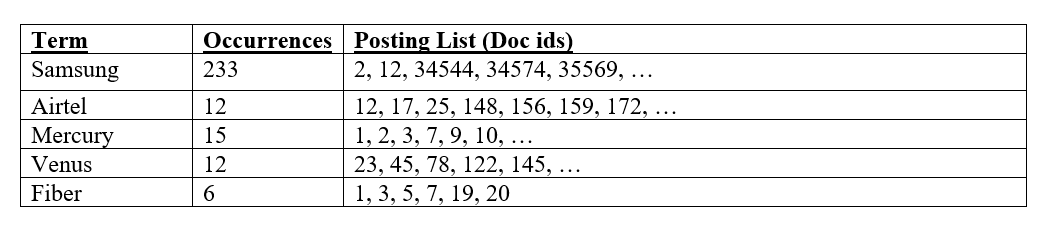

i.	Apply Binary coding for term “Mercury” (apply for all doc ids)

ii.	Apply Unary coding for term “Fiber”

iii.	Apply Elias Gamma Encoding for term “Airtel”

iv.	Apply Elias Delta Decoding for “000010000”

v.	Apply Elias Delta Encoding for term “Venus”

vi.	Apply Elias Delta Decoding for “00101001”

vii.	Apply Variable Byte Encoding for “Samsung”. (Use doc ids gap)


In [3]:
# Create a dictionary where multiple values are associated with a key
inverted_index = {'Samsung'   : [2, 12, 34544, 34574, 35569],
             'Airtel'   : [12, 17, 25, 148, 156, 159, 172],
             'Mercury' : [1, 2, 3, 7, 9, 10],
             'Venus' : [23, 45, 78, 122, 145],
             'Fiber'  : [1, 3, 5, 7, 19, 20] }

# Get multiple values of a key as list
mercury = inverted_index['Mercury']
airtel = inverted_index['Airtel']
fiber = inverted_index['Fiber']
venus = inverted_index['Venus']
samsung = inverted_index['Samsung']

In [15]:
from math import log
log2 = lambda x: log(x, 2)

def Binary(x, l = 1):
    s = '{0:0%db}' % l
    return s.format(x)
    
print("1. Binary coding for term “Mercury”")
for i,num in enumerate(mercury):
  x=mercury[i]  
  print(Binary(x))

1. Binary coding for term “Mercury”
1
10
11
111
1001
1010


In [16]:
def Unary(x):
    return (x-1)*'0'+'1'

print("\n2. Unary coding for term “Fiber”")
for i,num in enumerate(fiber):
  x=fiber[i]  
  print(Unary(x))


2. Unary coding for term “Fiber”
1
001
00001
0000001
0000000000000000001
00000000000000000001


In [17]:
def Elias_Gamma(x):
    if(x == 0):
        return '0'

    n = 1 + int(log2(x))
    b = x - 2**(int(log2(x)))

    l = int(log2(x))

    return Unary(n) + Binary(b, l)

print("\n3. Elias Gamma Encoding for term “Airtel”")
for i,num in enumerate(airtel):
  x=airtel[i]    
  print(Elias_Gamma(x))


3. Elias Gamma Encoding for term “Airtel”
0001100
000010001
000011001
000000010010100
000000010011100
000000010011111
000000010101100


In [20]:
import math
def Elias_Delta_Decoding(x):
    x = list(x)
    L = 0
    while True:
        if not x[L] == '0':
            break
        L = L + 1
        
    # Reading L more bits and dropping ALL  
    x = x[2*L+1:]
    
    # Prepending with 1 in MSB
    x.reverse()
    x.insert(0, '1')
    n = 0
    
    # Converting binary to integer
    for i in range(len(x)):
        if x[i] == '1':
            n = n+math.pow(2, i)
    return int(n)


x = '000010000'
print("\n4.Elias Delta Decoding for “000010000”\nDecoded number: ",Elias_Delta_Decoding(x))

from math import floor
def Binary_Representation_Without_MSB(x):
    binary = "{0:b}".format(int(x))
    binary_without_MSB = binary[1:]
    return binary_without_MSB

def EliasGammaEncode(k):
    if (k == 0):
        return '0'
    N = 1 + floor(log(k, 2))
    Unary = (N-1)*'0'+'1'
    return Unary + Binary_Representation_Without_MSB(k)

def EliasDeltaEncode(x):
    Gamma = EliasGammaEncode(1 + floor(log(k, 2)))
    binary_without_MSB = Binary_Representation_Without_MSB(k)
    return Gamma+binary_without_MSB

print("\n5. Elias Delta Encoding for term “Venus”")
for i,num in enumerate(venus):
  k=venus[i]  
  print(EliasDeltaEncode(k))


y = '00101001'
print("\n6.Elias Delta Decoding for “00101001”\nDecoded number: ",Elias_Delta_Decoding(y))


4.Elias Delta Decoding for “000010000”
Decoded number:  1

5. Elias Delta Encoding for term “Venus”
001010111
0011001101
00111001110
00111111010
00010000010001

6.Elias Delta Decoding for “00101001”
Decoded number:  3


In [21]:
from __future__ import division 
from struct import pack, unpack

def encode_number(number):
  
    bytes_list = []
    while True:
        bytes_list.insert(0, number % 128)
        if number < 128:
            break
        number = number // 128
    bytes_list[-1] += 128
    return pack('%dB' % len(bytes_list), *bytes_list)

def encode(numbers):
    bytes_list = []
    for number in numbers:
        bytes_list.append(encode_number(number))
    return b"".join(bytes_list)

def decode(bytestream):
    n = 0
    numbers = []
    bytestream = unpack('%dB' % len(bytestream), bytestream)
    for byte in bytestream:
        if byte < 128:
            n = 128 * n + byte
        else:
            n = 128 * n + (byte - 128)
            numbers.append(n)
            n = 0
    return numbers

print("\n7. Variable Byte Encoding for “Samsung”. ")
for i,num in enumerate(samsung):
  x=[samsung[i]]  
  print("Encoded: ", encode(x))
  print("Decoded: " ,decode(encode(x)))


7. Variable Byte Encoding for “Samsung”. 
Encoded:  b'\x82'
Decoded:  [2]
Encoded:  b'\x8c'
Decoded:  [12]
Encoded:  b'\x02\r\xf0'
Decoded:  [34544]
Encoded:  b'\x02\x0e\x8e'
Decoded:  [34574]
Encoded:  b'\x02\x15\xf1'
Decoded:  [35569]
